# Reduce model complexicity

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_moons(n_samples=250, noise = 0.05, random_state=42)

In [3]:
X.shape

(250, 2)

In [4]:
X

array([[ 8.41540974e-02,  1.13341197e-01],
       [ 1.05091536e+00,  1.54710235e-01],
       [-7.16555269e-01,  6.75607887e-01],
       [ 6.09316755e-02,  9.26542340e-01],
       [-1.00552480e+00,  3.36425155e-01],
       [ 7.63045744e-01, -4.82519400e-01],
       [ 1.30067681e+00, -4.60456076e-01],
       [ 8.93997023e-01, -5.39443631e-01],
       [ 1.01492378e+00,  2.49633435e-01],
       [-8.88621081e-01,  5.38566586e-01],
       [ 1.36613788e+00, -3.56819676e-01],
       [ 1.69872955e+00, -2.50238607e-01],
       [ 1.93909982e+00,  7.98335031e-02],
       [ 1.98164910e+00,  2.73166182e-01],
       [-1.92842298e-01,  9.90722796e-01],
       [ 1.87318667e+00, -1.28604429e-01],
       [ 1.12842503e+00, -4.29068613e-01],
       [ 9.60365014e-01,  5.24004362e-01],
       [ 6.83418960e-01, -4.32057757e-01],
       [ 8.36557987e-01,  5.74232279e-01],
       [ 2.04424212e+00,  4.47864563e-01],
       [ 7.89541222e-01,  4.20628768e-01],
       [-8.99855447e-01,  3.09253977e-01],
       [-1.

In [5]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

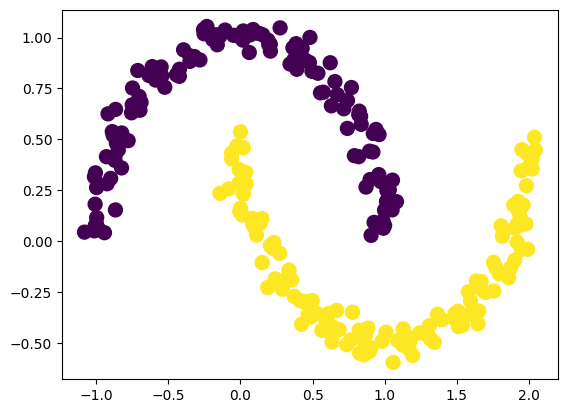

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.show()

In [7]:
## Observe here as compared to earlier implmentation in Vanishing-gradient-problem.ipynb we have reduced the number of hidden layers

model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer= 'adam',metrics=['accuracy'])

In [9]:
model.get_weights()[0]

array([[-0.17889446, -0.49119183,  0.04211468, -0.18297803, -0.3508307 ,
         0.44609517,  0.59982616, -0.4582234 , -0.45892033, -0.4282061 ],
       [ 0.4687894 ,  0.4382556 , -0.68295324, -0.06654751,  0.6579177 ,
         0.2841702 , -0.19190878, -0.11677241, -0.1450386 , -0.03354079]],
      dtype=float32)

In [10]:
old_weights = model.get_weights()[0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 8s 5ms/step - loss: 0.8141 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7944 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7760 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7595 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7457 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7351 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7264 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7178 - accuracy: 0.4900
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.4900
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.4900
Epoch 11/100
7/7 [===========

In [13]:
new_weight = model.get_weights()[0]

In [14]:
old_weights

array([[-0.17889446, -0.49119183,  0.04211468, -0.18297803, -0.3508307 ,
         0.44609517,  0.59982616, -0.4582234 , -0.45892033, -0.4282061 ],
       [ 0.4687894 ,  0.4382556 , -0.68295324, -0.06654751,  0.6579177 ,
         0.2841702 , -0.19190878, -0.11677241, -0.1450386 , -0.03354079]],
      dtype=float32)

In [15]:
new_weight

array([[-0.82861197, -0.9561116 ,  0.66596866,  0.5800486 , -0.8560025 ,
        -0.18413337,  1.1033314 , -1.0090424 , -1.0083516 ,  0.38010415],
       [ 1.7715619 ,  1.5444001 , -1.8327383 , -1.3440576 ,  1.7934422 ,
         1.2753915 , -1.4399961 ,  1.0137608 ,  0.9695302 , -1.2066435 ]],
      dtype=float32)

In [16]:
percent_change = abs(100*(old_weights - new_weight)/ old_weights)

In [17]:
percent_change

## Here we can clearly observe that decreasing the number of hidden layer drastically improved the model's performance as measure will reduced loss and increased accuracy.
## Also, there is significant change in the weights as well in the process. Therefore, we were able to address the Gradient Descent problem

array([[ 363.18478 ,   94.65137 , 1481.3221  ,  417.00452 ,  143.99303 ,
         141.27669 ,   83.94187 ,  120.20752 ,  119.722565,  188.76665 ],
       [ 277.90146 ,  252.3971  ,  168.35486 , 1919.6962  ,  172.5937  ,
         348.8125  ,  650.3545  ,  968.15094 ,  768.46356 , 3497.5408  ]],
      dtype=float32)

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

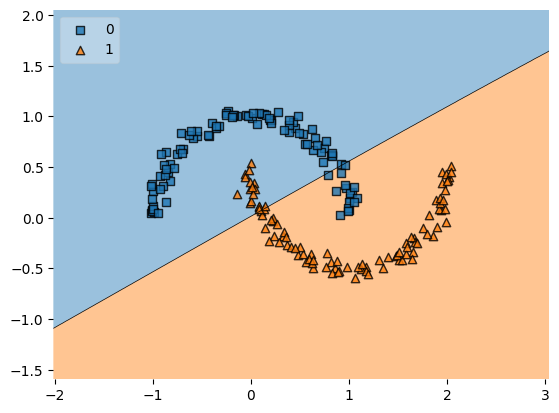

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.astype('int'), clf=model, legend=2)

##From below we can see the linear Decision boundary is able to classify correctly most of the datapoints. There is some overlapping because of which accuracy of this
##model measured above is slightly lower